NAME    : GURU AAKASH G




ROLL NO : 191IT220

SUBJECT : IT350 - DATA ANALYTICS

DATE    : 19-02-2022

TOPIC   : SHINGLES, JACCARD SIMILARITY, MIN-HASH SIGNATURE

CODE LINK : https://drive.google.com/file/d/1nCgb10BRDuSAEpgezo7DziB6UlpMTMOt/view?usp=sharing

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import numpy as np

# Dataset

Before working with the files, it is necessary to clean it first. Here cleaning means the text that is used for shingling should contains only alphabets and a space character.

Reading the file ---> splitting the text into words ---> converting all words of text to lowercase and storing it in a array ---> removing the punctuation marks from each words ---> removing remaining tokens that are not alphabetic ---> Finally combining all the words of array to a string of text. 

In [18]:
def cleaning_file(path):
    file = open(path, 'rt')
    text = file.read()
    file.close()
    
    tokens = word_tokenize(text)                                # split into words    
    tokens = [w.lower() for w in tokens]                        # convert to lower case    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]             # remove punctuation from each word    
    words = [word for word in stripped if word.isalpha()]       # remove remaining tokens that are not alphabetic
    text = ""
    for i in words:
        text = text + i + " "
    return text

In [19]:
f1 = cleaning_file('dataset/file1.txt')
f2 = cleaning_file('dataset/file2.txt')
f3 = cleaning_file('dataset/file3.txt')
f4 = cleaning_file('dataset/file4.txt')

Displaying the first 100 characters of the string of text of each files with its total number of characters and words

In [20]:
print("File 1 : ",f1[:100],"...")
print("File 2 : ",f2[:100],"...")
print("File 3 : ",f3[:100],"...")
print("File 4 : ",f4[:100],"...")

print("\n")
print("Total character in file 1 =",len(f1))
print("Total character in file 2 =",len(f2))
print("Total character in file 3 =",len(f3))
print("Total character in file 4 =",len(f4))
print("\n")
print("Total words in file 1 =",f1.count(" "))
print("Total words in file 2 =",f2.count(" "))
print("Total words in file 3 =",f3.count(" "))
print("Total words in file 4 =",f4.count(" "))

File 1 :  for children sly fox mr rabbit sat on his front porch rocking eating a great big carrot and looking  ...
File 2 :  the three wishes once upon a time a woodcutter lived happily with his wife in a pretty little log ca ...
File 3 :  the three little pigs once upon a time there were three little pigs who left their mummy and daddy t ...
File 4 :  six able men once upon a time there lived a young soldier named martin who had enlisted in the royal ...


Total character in file 1 = 7527
Total character in file 2 = 3994
Total character in file 3 = 5066
Total character in file 4 = 6625


Total words in file 1 = 1459
Total words in file 2 = 789
Total words in file 3 = 1018
Total words in file 4 = 1294


# Task

### Construct several types of k-shingles for all documents.

A k-shingle for a document is a sequence of distinct k characters that appears in the document. There are mainly 2 types of shingles. Those are character based shingles and word based shingles

In [21]:
def construct_shingles_character_based(k,text):
    shingle = []
    n = len(text)
    for i in range(0,n-k):
        x = text[i:i+k]
        if(x not in shingle):
            shingle.append(x)
    return shingle

def construct_shingles_word_based(k,text):
    shingle = []
    splitted_text = text.split(" ")
    n = len(splitted_text)
    for i in range(0,n-k):
        x = " ".join(splitted_text[i:i+k])
        if(x not in shingle):
            shingle.append(x)   
            
    return shingle

# Sub-Task

### Construct 5-shingles based on characters, for all documents.

In [22]:
shingle_5_character_f1 = construct_shingles_character_based(5,f1)
shingle_5_character_f2 = construct_shingles_character_based(5,f2)
shingle_5_character_f3 = construct_shingles_character_based(5,f3)
shingle_5_character_f4 = construct_shingles_character_based(5,f4)

Printing the fist 10 set of character based 5-shingles for all documents

In [23]:
print(shingle_5_character_f1[:10])
print(shingle_5_character_f2[:10])
print(shingle_5_character_f3[:10])
print(shingle_5_character_f4[:10])

['for c', 'or ch', 'r chi', ' chil', 'child', 'hildr', 'ildre', 'ldren', 'dren ', 'ren s']
['the t', 'he th', 'e thr', ' thre', 'three', 'hree ', 'ree w', 'ee wi', 'e wis', ' wish']
['the t', 'he th', 'e thr', ' thre', 'three', 'hree ', 'ree l', 'ee li', 'e lit', ' litt']
['six a', 'ix ab', 'x abl', ' able', 'able ', 'ble m', 'le me', 'e men', ' men ', 'men o']


### Construct 8-shingles based on characters, for all documents.

In [24]:
shingle_8_character_f1 = construct_shingles_character_based(8,f1)
shingle_8_character_f2 = construct_shingles_character_based(8,f2)
shingle_8_character_f3 = construct_shingles_character_based(8,f3)
shingle_8_character_f4 = construct_shingles_character_based(8,f4)

Printing the fist 10 set of character based 8-shingles for all documents

In [25]:
print(shingle_8_character_f1[:10])
print(shingle_8_character_f2[:10])
print(shingle_8_character_f3[:10])
print(shingle_8_character_f4[:10])

['for chil', 'or child', 'r childr', ' childre', 'children', 'hildren ', 'ildren s', 'ldren sl', 'dren sly', 'ren sly ']
['the thre', 'he three', 'e three ', ' three w', 'three wi', 'hree wis', 'ree wish', 'ee wishe', 'e wishes', ' wishes ']
['the thre', 'he three', 'e three ', ' three l', 'three li', 'hree lit', 'ree litt', 'ee littl', 'e little', ' little ']
['six able', 'ix able ', 'x able m', ' able me', 'able men', 'ble men ', 'le men o', 'e men on', ' men onc', 'men once']


### Construct 4-shingles based on words, for all documents.

In [26]:
shingle_4_word_f1 = construct_shingles_word_based(4,f1)
shingle_4_word_f2 = construct_shingles_word_based(4,f2)
shingle_4_word_f3 = construct_shingles_word_based(4,f3)
shingle_4_word_f4 = construct_shingles_word_based(4,f4)

Printing the fist 5 set of word  based 4-shingles for all documents

In [27]:
print(shingle_4_word_f1[:5])
print(shingle_4_word_f2[:5])
print(shingle_4_word_f3[:5])
print(shingle_4_word_f4[:5])

['for children sly fox', 'children sly fox mr', 'sly fox mr rabbit', 'fox mr rabbit sat', 'mr rabbit sat on']
['the three wishes once', 'three wishes once upon', 'wishes once upon a', 'once upon a time', 'upon a time a']
['the three little pigs', 'three little pigs once', 'little pigs once upon', 'pigs once upon a', 'once upon a time']
['six able men once', 'able men once upon', 'men once upon a', 'once upon a time', 'upon a time there']


# Questions

### How many distinct shingles are there for each document with each type of shingle?

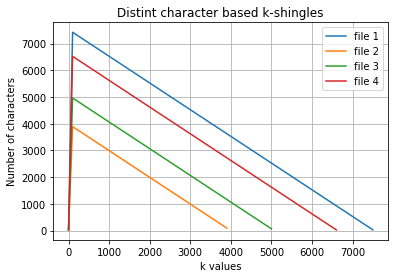

In [28]:
def distinct_character(f,interval):
    x = []
    y = []
    for i in range(1,len(f),interval):
        x.append(i)
        y.append(len(construct_shingles_character_based(i,f)))
    return x,y

interval = 100

x1,y1 = distinct_character(f1,interval)
x2,y2 = distinct_character(f2,interval)
x3,y3 = distinct_character(f3,interval)
x4,y4 = distinct_character(f4,interval)

plt.plot(x1,y1,label="file 1")
plt.plot(x2,y2,label="file 2")
plt.plot(x3,y3,label="file 3")
plt.plot(x4,y4,label="file 4")
plt.xlabel("k values")
plt.ylabel("Number of characters")
plt.title("Distint character based k-shingles")
plt.grid()
plt.legend()
plt.show()

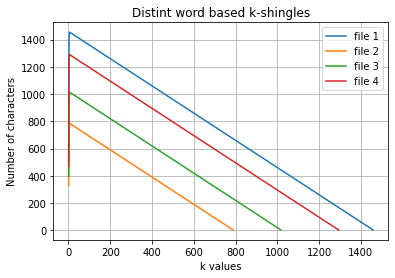

In [29]:
def distinct_word(f):
    x = []
    y = []
    t = f.count(" ")
    for i in range(1,t):
        x.append(i)
        y.append(len(construct_shingles_word_based(i,f)))
    return x,y

x1,y1 = distinct_word(f1)
x2,y2 = distinct_word(f2)
x3,y3 = distinct_word(f3)
x4,y4 = distinct_word(f4)

plt.plot(x1,y1,label="file 1")
plt.plot(x2,y2,label="file 2")
plt.plot(x3,y3,label="file 3")
plt.plot(x4,y4,label="file 4")
plt.xlabel("k values")
plt.ylabel("Number of characters")
plt.title("Distint word based k-shingles")
plt.grid()
plt.legend()
plt.show()

### Compute the Jaccard distance between all pairs of documents for each type of shingling.

Jaccard similarity = intersection(a,b)/union(a,b)

Jaccard distance = 1 - Jaccard similarity

Displaying jaccard similarity between all the pairs of the document for first 25 elements for character based k-shingles

In [35]:
def jaccard_distance_character_based(fx,fy,k):
    for i in range(1,k):
        c = 0
        s1 = construct_shingles_character_based(i,fx)
        s2 = construct_shingles_character_based(i,fy)
        for j in s1:
            if(j in s2):
                c = c + 1
        print("For ( k=",i,")shingles =",1-(c/(len(s1)+len(s2)-c)))

length = 25
        
print("\nJaccard distance between file 1 and file 2 :")
jaccard_distance_character_based(f1,f2,length)
print("\n\nJaccard distance between file 1 and file 3 :")
jaccard_distance_character_based(f1,f3,length)
print("\n\nJaccard distance between file 1 and file 4 :")
jaccard_distance_character_based(f1,f4,length)
print("\n\nJaccard distance between file 2 and file 3 :")
jaccard_distance_character_based(f2,f3,length)
print("\n\nJaccard distance between file 2 and file 4 :")
jaccard_distance_character_based(f2,f4,length)
print("\n\nJaccard distance between file 3 and file 4 :")
jaccard_distance_character_based(f3,f4,length)


Jaccard distance between file 1 and file 2 :
For ( k= 1 )shingles = 0.0
For ( k= 2 )shingles = 0.19117647058823528
For ( k= 3 )shingles = 0.5266237565827969
For ( k= 4 )shingles = 0.7485990830361691
For ( k= 5 )shingles = 0.8566139347021204
For ( k= 6 )shingles = 0.9141522029372496
For ( k= 7 )shingles = 0.9474171878619412
For ( k= 8 )shingles = 0.9690579633358058
For ( k= 9 )shingles = 0.981247492980345
For ( k= 10 )shingles = 0.9891881455738971
For ( k= 11 )shingles = 0.9937118723603942
For ( k= 12 )shingles = 0.996134376438104
For ( k= 13 )shingles = 0.997278664731495
For ( k= 14 )shingles = 0.9982046678635548
For ( k= 15 )shingles = 0.9986636971046771
For ( k= 16 )shingles = 0.999025427482945
For ( k= 17 )shingles = 0.9992943459468996
For ( k= 18 )shingles = 0.9995605168322054
For ( k= 19 )shingles = 0.9998247151621384
For ( k= 20 )shingles = 1.0
For ( k= 21 )shingles = 1.0
For ( k= 22 )shingles = 1.0
For ( k= 23 )shingles = 1.0
For ( k= 24 )shingles = 1.0


Jaccard distance betwe

Displaying jaccard similarity between all the pairs of the document for first 10 elements for word based k-shingles

In [36]:
def jaccard_distance_word_based(fx,fy,k):
    for i in range(1,k):
        c = 0
        s1 = construct_shingles_word_based(i,fx)
        s2 = construct_shingles_word_based(i,fy)
        for j in s1:
            if(j in s2):
                c = c + 1
        print("For ( k=",i,")shingles =",1-(c/(len(s1)+len(s2)-c)))

length = 10

print("Jaccard distance between file 1 and file 2 :")
jaccard_distance_word_based(f1,f2,length)
print("\n\nJaccard distance between file 1 and file 3 :")
jaccard_distance_word_based(f1,f3,length)
print("\n\nJaccard distance between file 1 and file 4 :")
jaccard_distance_word_based(f1,f4,length)
print("\n\nJaccard distance between file 2 and file 3 :")
jaccard_distance_word_based(f2,f3,length)
print("\n\nJaccard distance between file 2 and file 4 :")
jaccard_distance_word_based(f2,f4,length)
print("\n\nJaccard distance between file 3 and file 4 :")
jaccard_distance_word_based(f3,f4,length)

Jaccard distance between file 1 and file 2 :
For ( k= 1 )shingles = 0.7953890489913544
For ( k= 2 )shingles = 0.9668478260869565
For ( k= 3 )shingles = 0.9953810623556582
For ( k= 4 )shingles = 0.9986510791366906
For ( k= 5 )shingles = 0.9995531724754245
For ( k= 6 )shingles = 1.0
For ( k= 7 )shingles = 1.0
For ( k= 8 )shingles = 1.0
For ( k= 9 )shingles = 1.0


Jaccard distance between file 1 and file 3 :
For ( k= 1 )shingles = 0.7933333333333333
For ( k= 2 )shingles = 0.9615576635047429
For ( k= 3 )shingles = 0.9957983193277311
For ( k= 4 )shingles = 0.9983646770237122
For ( k= 5 )shingles = 0.999187982135607
For ( k= 6 )shingles = 0.9995944849959448
For ( k= 7 )shingles = 1.0
For ( k= 8 )shingles = 1.0
For ( k= 9 )shingles = 1.0


Jaccard distance between file 1 and file 4 :
For ( k= 1 )shingles = 0.7848258706467661
For ( k= 2 )shingles = 0.961038961038961
For ( k= 3 )shingles = 0.9977502812148481
For ( k= 4 )shingles = 1.0
For ( k= 5 )shingles = 1.0
For ( k= 6 )shingles = 1.0
For (

### Change to any Similarity Function (use any recent similarity distance) and check the distance.

Using cosine similarity

Cosine similarity is a metric used to determine how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space

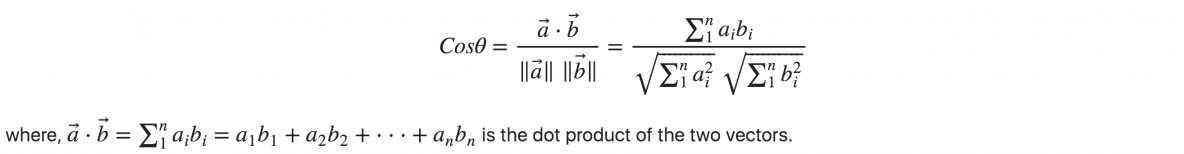

In [37]:
def cosine_similarity_character_based(fx,fy,n):
    for k in range(1,n):
        s1 = construct_shingles_character_based(k,fx)
        s2 = construct_shingles_character_based(k,fy)
        union_list = s1.copy()
        union_list.extend(s2)
        union_list = list(set(union_list))
        l1 = []
        l2 = []
        for i in union_list:
            if i in s1:
                l1.append(1)
            else:
                l1.append(0)
            if i in s2:
                l2.append(1)
            else:
                l2.append(0)
        c = 0
        for i in range(0,len(union_list)):
            c = c + l1[i]*l2[i]
        print("For ( k=",k,")shingles =",c/float((sum(l1)*sum(l2))**0.5))

length = 24
        
print("Character based cosine similarity between file 1 and file 2 :")
cosine_similarity_character_based(f1,f2,length)
print("Character based cosine similarity between file 1 and file 3 :")
cosine_similarity_character_based(f1,f3,length)
print("Character based cosine similarity between file 1 and file 4 :")
cosine_similarity_character_based(f1,f4,length)
print("Character based cosine similarity between file 2 and file 3 :")
cosine_similarity_character_based(f2,f3,length)
print("Character based cosine similarity between file 2 and file 4 :")
cosine_similarity_character_based(f2,f4,length)
print("Character based cosine similarity between file 3 and file 4 :")
cosine_similarity_character_based(f3,f4,length)

Character based cosine similarity between file 1 and file 2 :
For ( k= 1 )shingles = 1.0
For ( k= 2 )shingles = 0.8949350072982828
For ( k= 3 )shingles = 0.6501785021932229
For ( k= 4 )shingles = 0.4121584653806553
For ( k= 5 )shingles = 0.25954710182817986
For ( k= 6 )shingles = 0.16438084449185433
For ( k= 7 )shingles = 0.10419907560431345
For ( k= 8 )shingles = 0.06276226944888254
For ( k= 9 )shingles = 0.03855403934111287
For ( k= 10 )shingles = 0.022433627187108066
For ( k= 11 )shingles = 0.01312203666503183
For ( k= 12 )shingles = 0.008094409004028528
For ( k= 13 )shingles = 0.005707959571657899
For ( k= 14 )shingles = 0.003770228292806415
For ( k= 15 )shingles = 0.0028078184927554776
For ( k= 16 )shingles = 0.0020486204634599377
For ( k= 17 )shingles = 0.0014836614092883257
For ( k= 18 )shingles = 0.0009241488066170127
For ( k= 19 )shingles = 0.0003686511499930488
For ( k= 20 )shingles = 0.0
For ( k= 21 )shingles = 0.0
For ( k= 22 )shingles = 0.0
For ( k= 23 )shingles = 0.0
Char

In [38]:
def cosine_similarity_word_based(fx,fy,n):
    for k in range(1,n):
        s1 = construct_shingles_word_based(k,fx)
        s2 = construct_shingles_word_based(k,fy)
        union_list = s1.copy()
        union_list.extend(s2)
        union_list = list(set(union_list))
        l1 = []
        l2 = []
        for i in union_list:
            if i in s1:
                l1.append(1)
            else:
                l1.append(0)
            if i in s2:
                l2.append(1)
            else:
                l2.append(0)
        c = 0
        for i in range(0,len(union_list)):
            c = c + l1[i]*l2[i]
        print("For ( k=",k,")shingles =",c/float((sum(l1)*sum(l2))**0.5))

length = 10

print("Word based cosine similarity between file 1 and file 2 :")
cosine_similarity_word_based(f1,f2,length)
print("Word based cosine similarity between file 1 and file 3 :")
cosine_similarity_word_based(f1,f3,length)
print("Word based cosine similarity between file 1 and file 4 :")
cosine_similarity_word_based(f1,f4,length)
print("Word based cosine similarity between file 2 and file 3 :")
cosine_similarity_word_based(f2,f3,length)
print("Word based cosine similarity between file 2 and file 4 :")
cosine_similarity_word_based(f2,f4,length)
print("Word based cosine similarity between file 3 and file 4 :")
cosine_similarity_word_based(f3,f4,length)

Word based cosine similarity between file 1 and file 2 :
For ( k= 1 )shingles = 0.34806117092923045
For ( k= 2 )shingles = 0.06690149070641849
For ( k= 3 )shingles = 0.009628524195863585
For ( k= 4 )shingles = 0.0028246734309203703
For ( k= 5 )shingles = 0.0009360153444874006
For ( k= 6 )shingles = 0.0
For ( k= 7 )shingles = 0.0
For ( k= 8 )shingles = 0.0
For ( k= 9 )shingles = 0.0
Word based cosine similarity between file 1 and file 3 :
For ( k= 1 )shingles = 0.3452432641379077
For ( k= 2 )shingles = 0.07516009089375288
For ( k= 3 )shingles = 0.008507019059648768
For ( k= 4 )shingles = 0.003320793341969046
For ( k= 5 )shingles = 0.0016495755641688233
For ( k= 6 )shingles = 0.0008239731766687861
For ( k= 7 )shingles = 0.0
For ( k= 8 )shingles = 0.0
For ( k= 9 )shingles = 0.0
Word based cosine similarity between file 1 and file 4 :
For ( k= 1 )shingles = 0.3544575941530379
For ( k= 2 )shingles = 0.0750971992551518
For ( k= 3 )shingles = 0.004496141998319831
For ( k= 4 )shingles = 0.0
Fo

### Try the above all for any one Indian language.

Finding the jaccard distance and cosine similarity for a sentence in tamil language

In [39]:
tamiltxt1 = "ஒரு கிராமத்துல ஒரு அழகான பாப்பா இருந்துச்சு அவளுக்கு எப்பவுமோ குளிருக்கு சிகப்பு முக்காடு போட்டுகிறது ரொம்ப பிடிக்கும் அதனால அங்க இருந்த எல்லாரும் அவளை லிட்டில் ரெட் ரைடிங் ஹூட் னு சொல்லுவாங்க"
tamiltxt2 = "அந்த பாப்பா ஒருநாள் அவுங்க பாட்டி வீட்டுக்கு கிளம்பி போனா போற வழியில ஒரு அவலட்சணமான விறகு வெட்ரவர பாத்தா அவரு கிட்ட போய் ஐய்யா நீங்க நலமான்னு கேட்டா தங்கிட்ட யாரும் பேச மாட்டாங்கனு தனிமையில வாழ்ந்துட்டு வந்த அந்த விறகு வெட்டுபவர் இந்த அழகான பெண்ணோட கரிசனமான விசாரிப்ப கேட்டதும் ரொம்ப மகிழ்ந்து போனாரு"

print("Character based jaccard distance between txt 1 and txt 2 :")
jaccard_distance_character_based(tamiltxt1,tamiltxt2,10)
print("\n\nWord based jaccard distance between txt 1 and txt 2 :")
jaccard_distance_word_based(tamiltxt1,tamiltxt2,4)
print("\n\nCharacter based cosine similarity between txt 1 and txt 2 :")
cosine_similarity_character_based(tamiltxt1,tamiltxt2,10)
print("\n\nWord based cosine similarity between txt 1 and txt 2 :")
cosine_similarity_word_based(tamiltxt1,tamiltxt2,4)

Character based jaccard distance between txt 1 and txt 2 :
For ( k= 1 )shingles = 0.22857142857142854
For ( k= 2 )shingles = 0.6770833333333333
For ( k= 3 )shingles = 0.8353658536585366
For ( k= 4 )shingles = 0.9097744360902256
For ( k= 5 )shingles = 0.954337899543379
For ( k= 6 )shingles = 0.9736263736263736
For ( k= 7 )shingles = 0.9871244635193133
For ( k= 8 )shingles = 0.9957446808510638
For ( k= 9 )shingles = 1.0


Word based jaccard distance between txt 1 and txt 2 :
For ( k= 1 )shingles = 0.9298245614035088
For ( k= 2 )shingles = 1.0
For ( k= 3 )shingles = 1.0


Character based cosine similarity between txt 1 and txt 2 :
For ( k= 1 )shingles = 0.8714212528966687
For ( k= 2 )shingles = 0.49316748953083744
For ( k= 3 )shingles = 0.286521542985156
For ( k= 4 )shingles = 0.16877060313785835
For ( k= 5 )shingles = 0.0893204338137869
For ( k= 6 )shingles = 0.05263765474293814
For ( k= 7 )shingles = 0.026064301757134343
For ( k= 8 )shingles = 0.008688100585711449
For ( k= 9 )shingles =

# Conclusion

Differences between Jaccard Similarity and Cosine Similarity: Jaccard similarity takes only unique set of words for each sentence / document while cosine similarity takes total length of the vectors. (these vectors could be made from bag of words term frequency or tf-idf). Also from above results we can conclude the most of the similarity between the documents are there until k=25 shingles for character based and k=10 shingles for word based. Also jaccard similarity are giving the best results when compared to cosine similarity because jaccard similarity is high as compared to cosine similarity for some k-shingles.